In [1]:
from src.helpers.experiment import create_tsfresh_dataframe
from run import Experiment
from src.bgc_providers.ohio_bgc_provider import OhioBgcProvider
from src.featurizers.tsfresh import TsfreshFeaturizer

In [2]:
provider = OhioBgcProvider()
for glucose_event in provider.get_glycose_levels()[:20]:
    print(glucose_event.attrib['value'])


101
98
104
112
120
127
135
142
140
145
148
151
150
124
130
127
121
115
111
109


In [3]:
tsfresh_df = provider.tsfresh_dataframe()

tsfresh_df.head(20)

,date_time,mock_date,time_of_day,part_of_day,time,bg_value,id
0,2021-12-07 01:17:00,2021-12-07,01:17:00,late night,0.00,101,a
1,2021-12-07 01:22:00,2021-12-07,01:22:00,late night,0.08,98,a
2,2021-12-07 01:27:00,2021-12-07,01:27:00,late night,0.17,104,a
3,2021-12-07 01:32:00,2021-12-07,01:32:00,late night,0.25,112,a
4,2021-12-07 01:37:00,2021-12-07,01:37:00,late night,0.33,120,a
5,2021-12-07 01:42:00,2021-12-07,01:42:00,late night,0.42,127,a
6,2021-12-07 01:47:00,2021-12-07,01:47:00,late night,0.50,135,a
7,2021-12-07 01:52:00,2021-12-07,01:52:00,late night,0.58,142,a
8,2021-12-07 01:57:00,2021-12-07,01:57:00,late night,0.67,140,a
9,2021-12-07 02:02:00,2021-12-07,02:02:00,late night,0.75,145,a


In [6]:
import plotly.express as px

fig = px.line(tsfresh_df, x='date_time', y="bg_value")
fig.show()

  0%|          | 0/9 [00:00<?, ?it/s]findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


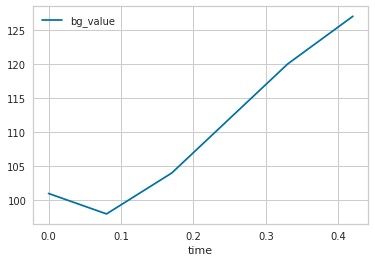

 11%|█         | 1/9 [00:00<00:02,  3.06it/s]

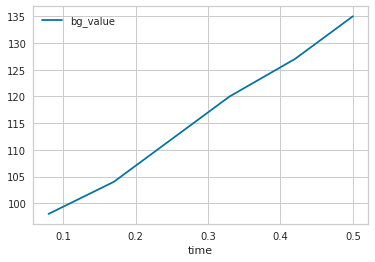

 22%|██▏       | 2/9 [00:00<00:02,  3.33it/s]

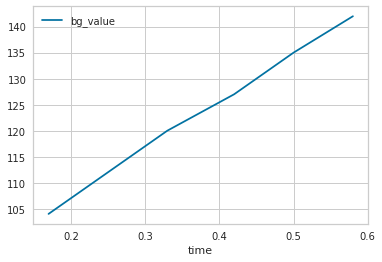

 33%|███▎      | 3/9 [00:00<00:01,  3.36it/s]

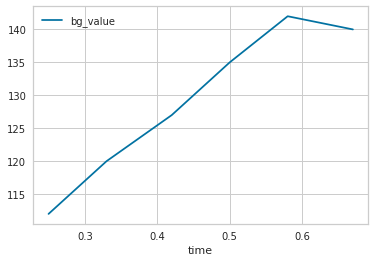

 44%|████▍     | 4/9 [00:01<00:01,  3.48it/s]

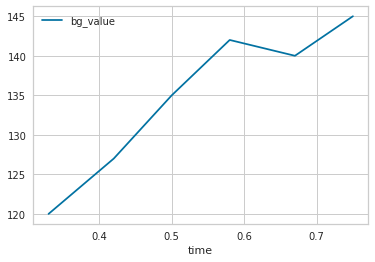

 56%|█████▌    | 5/9 [00:01<00:01,  3.74it/s]

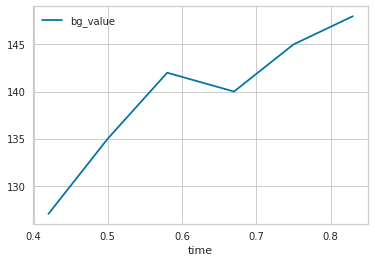

 67%|██████▋   | 6/9 [00:01<00:00,  3.64it/s]

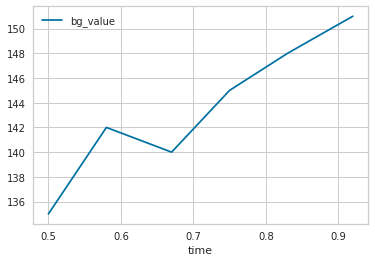

 78%|███████▊  | 7/9 [00:01<00:00,  3.84it/s]

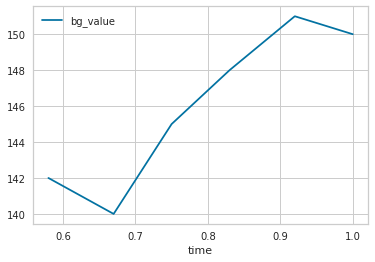

 89%|████████▉ | 8/9 [00:02<00:00,  4.00it/s]

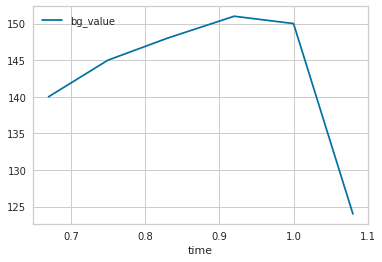

100%|██████████| 9/9 [00:02<00:00,  3.66it/s]


In [4]:
ts = TsfreshFeaturizer(tsfresh_df.head(20),6,6,plot_chunks=True)
# ts = TsfreshFeaturizer(tsfresh_df,6,6)
feature_df = ts.create_labeled_dataframe()

In [5]:
ts.labeled_dataframe

,bg_value__sum_values,bg_value__median,bg_value__mean,bg_value__length,bg_value__standard_deviation,bg_value__variance,bg_value__root_mean_square,bg_value__maximum,bg_value__absolute_maximum,bg_value__minimum,start,end,start_time,end_time,start_time_of_day,end_time_of_day,part_of_day,label
0,662.0,108.0,110.333333,6.0,10.434984,108.888889,110.825689,127.0,127.0,98.0,0,5,0.00,0.42,01:17:00,01:42:00,late night,151
1,696.0,116.0,116.000000,6.0,12.793227,163.666667,116.703328,135.0,135.0,98.0,1,6,0.08,0.50,01:22:00,01:47:00,late night,150
2,740.0,123.5,123.333333,6.0,12.982895,168.555556,124.014784,142.0,142.0,104.0,2,7,0.17,0.58,01:27:00,01:52:00,late night,124
3,776.0,131.0,129.333333,6.0,10.796090,116.555556,129.783152,142.0,142.0,112.0,3,8,0.25,0.67,01:32:00,01:57:00,late night,130
4,809.0,137.5,134.833333,6.0,8.782875,77.138889,135.119083,145.0,145.0,120.0,4,9,0.33,0.75,01:37:00,02:02:00,late night,127
5,837.0,141.0,139.500000,6.0,6.898067,47.583333,139.670445,148.0,148.0,127.0,5,10,0.42,0.83,01:42:00,02:07:00,late night,121
6,861.0,143.5,143.500000,6.0,5.251984,27.583333,143.596077,151.0,151.0,135.0,6,11,0.50,0.92,01:47:00,02:12:00,late night,115
7,876.0,146.5,146.000000,6.0,4.041452,16.333333,146.055925,151.0,151.0,140.0,7,12,0.58,1.00,01:52:00,02:17:00,late night,111
8,858.0,146.5,143.000000,6.0,9.237604,85.333333,143.298058,151.0,151.0,124.0,8,13,0.67,1.08,01:57:00,02:22:00,late night,109


In [6]:
ts.labeled_dataframe.columns

Index(['bg_value__sum_values', 'bg_value__median', 'bg_value__mean',
       'bg_value__length', 'bg_value__standard_deviation',
       'bg_value__variance', 'bg_value__root_mean_square', 'bg_value__maximum',
       'bg_value__absolute_maximum', 'bg_value__minimum', 'start', 'end',
       'start_time', 'end_time', 'start_time_of_day', 'end_time_of_day',
       'part_of_day', 'label'],
      dtype='object')

In [7]:
exp = Experiment(559,6,6, enable_neptune=False)

In [8]:
df = create_tsfresh_dataframe(exp.train_parameters)
df

2022-06-09 08:05:29.784 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_train_0_6_6.pkl
2022-06-09 08:05:29.900 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 6, 'minimal_features': False}
2022-06-09 08:05:30.198 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing pickle file. Continuing...
2022-06-09 08:05:30.199 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_0_6_6.pkl


,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,bg_value__mean,bg_value__length,bg_value__standard_deviation,bg_value__variation_coefficient,bg_value__variance,bg_value__skewness,bg_value__kurtosis,bg_value__root_mean_square,bg_value__absolute_sum_of_changes,bg_value__longest_strike_below_mean,bg_value__longest_strike_above_mean,bg_value__count_above_mean,bg_value__count_below_mean,bg_value__last_location_of_maximum,bg_value__first_location_of_maximum,bg_value__last_location_of_minimum,bg_value__first_location_of_minimum,bg_value__percentage_of_reoccurring_values_to_all_values,bg_value__percentage_of_reoccurring_datapoints_to_all_datapoints,bg_value__sum_of_reoccurring_values,bg_value__sum_of_reoccurring_data_points,bg_value__ratio_value_number_to_time_series_length,bg_value__sample_entropy,bg_value__maximum,bg_value__minimum,bg_value__benford_correlation,bg_value__time_reversal_asymmetry_statistic__lag_1,bg_value__time_reversal_asymmetry_statistic__lag_2,bg_value__time_reversal_asymmetry_statistic__lag_3,bg_value__c3__lag_1,bg_value__c3__lag_2,bg_value__c3__lag_3,bg_value__cid_ce__normalize_True,bg_value__cid_ce__normalize_False,bg_value__symmetry_looking__r_0.0,bg_value__symmetry_looking__r_0.05,bg_value__symmetry_looking__r_0.1,bg_value__symmetry_looking__r_0.15000000000000002,bg_value__symmetry_looking__r_0.2,bg_value__symmetry_looking__r_0.25,bg_value__symmetry_looking__r_0.30000000000000004,bg_value__symmetry_looking__r_0.35000000000000003,bg_value__symmetry_looking__r_0.4,bg_value__symmetry_looking__r_0.45,bg_value__symmetry_looking__r_0.5,bg_value__symmetry_looking__r_0.55,bg_value__symmetry_looking__r_0.6000000000000001,bg_value__symmetry_looking__r_0.65,bg_value__symmetry_looking__r_0.7000000000000001,bg_value__symmetry_looking__r_0.75,bg_value__symmetry_looking__r_0.8,bg_value__symmetry_looking__r_0.8500000000000001,bg_value__symmetry_looking__r_0.9,bg_value__symmetry_looking__r_0.9500000000000001,bg_value__large_standard_deviation__r_0.05,bg_value__large_standard_deviation__r_0.1,bg_value__large_standard_deviation__r_0.15000000000000002,bg_value__large_standard_deviation__r_0.2,bg_value__large_standard_deviation__r_0.25,bg_value__large_standard_deviation__r_0.30000000000000004,bg_value__large_standard_deviation__r_0.35000000000000003,bg_value__large_standard_deviation__r_0.4,bg_value__large_standard_deviation__r_0.45,bg_value__large_standard_deviation__r_0.5,bg_value__large_standard_deviation__r_0.55,bg_value__large_standard_deviation__r_0.6000000000000001,bg_value__large_standard_deviation__r_0.65,bg_value__large_standard_deviation__r_0.7000000000000001,bg_value__large_standard_deviation__r_0.75,bg_value__large_standard_deviation__r_0.8,bg_value__large_standard_deviation__r_0.8500000000000001,bg_value__large_standard_deviation__r_0.9,bg_value__large_standard_deviation__r_0.9500000000000001,bg_value__quantile__q_0.1,bg_value__quantile__q_0.2,bg_value__quantile__q_0.3,bg_value__quantile__q_0.4,bg_value__quantile__q_0.6,bg_value__quantile__q_0.7,bg_value__quantile__q_0.8,bg_value__quantile__q_0.9,bg_value__autocorrelation__lag_0,bg_value__autocorrelation__lag_1,bg_value__autocorrelation__lag_2,bg_value__autocorrelation__lag_3,bg_value__autocorrelation__lag_4,bg_value__autocorrelation__lag_5,bg_value__autocorrelation__lag_6,bg_value__autocorrelation__lag_7,bg_value__autocorrelation__lag_8,bg_value__autocorrelation__lag_9,"bg_value__agg_autocorrelation__f_agg_""mean""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""median""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""var""__maxlag_40",bg_value__partial_autocorrelation__lag_0,bg_value__partial_autocorrelation__lag_1,bg_value__partial_autocorrelation__lag_2,bg_value__partial_autocorrelation__lag_3,bg_value__partial_autocorrelation__

In [9]:
print(df.columns)

Index(['bg_value__variance_larger_than_standard_deviation',
       'bg_value__has_duplicate_max', 'bg_value__has_duplicate_min',
       'bg_value__has_duplicate', 'bg_value__sum_values',
       'bg_value__abs_energy', 'bg_value__mean_abs_change',
       'bg_value__mean_change', 'bg_value__mean_second_derivative_central',
       'bg_value__median',
       ...
       'bg_value__matrix_profile__feature_"max"__threshold_0.98',
       'bg_value__matrix_profile__feature_"mean"__threshold_0.98',
       'bg_value__matrix_profile__feature_"median"__threshold_0.98',
       'bg_value__matrix_profile__feature_"25"__threshold_0.98',
       'bg_value__matrix_profile__feature_"75"__threshold_0.98', 'start',
       'end', 'start_time', 'end_time', 'label'],
      dtype='object', length=792)


In [10]:
# df.to_csv('exp1.csv')

In [1]:
import pandas as pd
df_test = pd.read_pickle('dataframes/559_train_0_6_6.pkl')
df_test

,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,...,"bg_value__matrix_profile__feature_""75""__threshold_0.98",bg_value__mean_n_absolute_max__number_of_maxima_7,start,end,start_time,end_time,start_time_of_day,end_time_of_day,part_of_day,label
0,1.0,0.0,0.0,0.0,662.0,73694.0,6.4,5.2,1.250,108.0,...,NaN,NaN,0,5,0.00,0.42,01:17:00,01:42:00,late night,151
1,1.0,0.0,0.0,0.0,696.0,81718.0,7.4,7.4,0.250,116.0,...,NaN,NaN,1,6,0.08,0.50,01:22:00,01:47:00,late night,150
2,1.0,0.0,0.0,0.0,740.0,92278.0,7.6,7.6,-0.125,123.5,...,NaN,NaN,2,7,0.17,0.58,01:27:00,01:52:00,late night,124
3,1.0,0.0,0.0,0.0,776.0,101062.0,6.4,5.6,-1.250,131.0,...,NaN,NaN,3,8,0.25,0.67,01:32:00,01:57:00,late night,130
4,1.0,0.0,0.0,0.0,809.0,109543.0,5.8,5.0,-0.250,137.5,...,NaN,NaN,4,9,0.33,0.75,01:37:00,02:02:00,late night,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10780,0.0,0.0,1.0,1.0,889.0,131721.0,0.2,0.2,0.125,148.0,...,NaN,NaN,10780,10785,1005.40,1005.82,22:41:00,23:06:00,night,161
10781,0.0,0.0,1.0,1.0,891.0,132317.0,0.4,0.4,0.125,148.0,...,NaN,NaN,10781,10786,1005.48,1005.90,22:46:00,23:11:00,night,164
10782,1.0,0.0,1.0,1.0,895.0,133517.0,0.8,0.8,0.250,148.5,...,NaN,NaN,10782,10787,1005.57,1005.98,22:51:00,23:16:00,night,168
10783,1.0,0.0,1.0,1.0,902.0,135638.0,1.4,1.4,0.375,149.5,...,NaN,NaN,10783,10788,1005.65,1006.07,22:56:00,23:21:00,night,172
